In [1]:
import pandas as pd
import numpy as np
import glob 
import os 

In [2]:
!ls 

barplots                  data
crs_research_(0607).ipynb piecharts


In [3]:
os.chdir(r'data')
allfiles= glob.glob('*.txt') ; allfiles

['CRS 2012 data.txt',
 'CRS 2013 data.txt',
 'CRS 2018 data.txt',
 'CRS 2019 data.txt',
 'CRS 2015 data.txt',
 'CRS 2014 data.txt',
 'CRS 2020 data.txt',
 'CRS 2011 data.txt',
 'CRS 2010 data.txt',
 'CRS 2016 data.txt',
 'CRS 2017 data.txt']

In [4]:
li = []

for filename in allfiles:
    df = pd.read_csv(filename, sep = "|", engine = 'python', encoding = "ISO-8859-1")
    li.append(df)

In [5]:
data = pd.concat(li).sort_values(by = "Year", ascending=False).reset_index(drop=True)

## DEFINE
1. Institution keys
2. receipient keys 
3. ind_codes

In [6]:
inst_keys = {'ADB': [46004],
                'UNIDO': [41123],
                'WBG': [44001, 44002, 44003, 44004, 44005, 44006, 44007, 44008]}

receipient_countries = {'Cambodia': 728, 
                        'Indonesia': 738,
                        'Myanmar': 635,
                        'Philippines': 755,
                        'Thailand': 764,
                        'Vietnam': 769,
                        'Laos': 745}

ind_codes = [22010, 22020, 22030, 22040, 23010, 23020, 23030, 23040, 23050,
                23061, 23062, 23063, 23064, 23065, 23066, 23067, 23068,23069,
                23070, 23081, 23082, 32110, 32120, 32130, 32140, 32161, 32162,
                32163, 32164, 32165, 32166, 32167, 32168, 32169, 32170, 32171,
                32172, 32182, 32210, 32220, 32261, 32262, 32263, 32264, 32265,
                32266, 32267, 32268, 32310, 33120, 33130, 33140, 33181, 33210]

## Split crs data in 
1. total 
2. industry related

In [7]:
total_data = []
ind_data = []

for keys in inst_keys:
    x = data[data['ChannelCode'].isin(inst_keys[keys])]
    x = x[x['RecipientCode'].isin(receipient_countries.values())]
    # create total data
    tot = x.loc[:,['RecipientCode', 'RecipientName', 'Year','ChannelCode', 'ChannelName', 'ProjectTitle','ShortDescription', 'LongDescription', 'USD_Disbursement']].sort_values(by = ['RecipientCode','Year'], ascending=True).reset_index(drop=True)
    tot["full_text"] = tot["ProjectTitle"] + ' ' + tot["ShortDescription"] + ' ' + tot["LongDescription"]
    total_data.append(tot)
    # filter data in industry sector
    ind = x[x['PurposeCode'].isin(ind_codes)]
    ind = ind.loc[:,['RecipientCode', 'RecipientName','Year','ChannelCode', 'ChannelName', 'ProjectTitle','ShortDescription', 'LongDescription', 'USD_Disbursement']].sort_values(by = ['RecipientCode','Year'], ascending=True).reset_index(drop=True)
    ind["full_text"] = ind["ProjectTitle"] + ' ' + ind["ShortDescription"] + ' ' + ind["LongDescription"]
    ind_data.append(ind)

In [8]:
def list_to_csv(list_name,filename):
    for i in list_name:
        channel_name = i['ChannelName'][0].replace(' ', '_')
        i.to_csv(str(filename)+'_'+channel_name+".csv")

In [9]:
list_to_csv(total_data,'total')
list_to_csv(ind_data,'ind')

In [10]:
# ADB_i = pd.DataFrame(ind_data[0]).sort_values(by = "Year", ascending=False).reset_index(drop=True)
# ADB_i = ADB_i[pd.notnull(ADB_i['USD_Disbursement'])]
# UNIDO_i = pd.DataFrame(ind_data[1]).sort_values(by = "Year", ascending=False).reset_index(drop=True)
# UNIDO_i = UNIDO_i[pd.notnull(UNIDO_i['USD_Disbursement'])]
# WBG_i = pd.DataFrame(ind_data[2]).sort_values(by = "Year", ascending=False).reset_index(drop=True)
# WBG_i = WBG_i[pd.notnull(WBG_i['USD_Disbursement'])]
# ADB_t = pd.DataFrame(total_data[0]).sort_values(by = "Year", ascending=False).reset_index(drop=True)
# ADB_t = ADB_t[pd.notnull(ADB_t['USD_Disbursement'])]
# UNIDO_t = pd.DataFrame(total_data[1]).sort_values(by = "Year", ascending=False).reset_index(drop=True)
# UNIDO_t = UNIDO_t[pd.notnull(UNIDO_t['USD_Disbursement'])]
# WBG_t = pd.DataFrame(total_data[2]).sort_values(by = "Year", ascending=False).reset_index(drop=True)
# WBG_t = WBG_t[pd.notnull(WBG_t['USD_Disbursement'])]
# ADB_t.groupby(['RecipientName','Year']).sum('USD_Disbursement').to_csv("ADB_t.csv")
# UNIDO_t.groupby(['RecipientName','Year']).sum('USD_Disbursement').to_csv("UNIDO_t.csv")
# WBG_t.groupby(['RecipientName','Year']).sum('USD_Disbursement').to_csv("WBG_t.csv")

## Draw lineplot
1. Disbursement sum with indstry filter
2. Disbursement sum without indstry filter
3. count with indstry filter
3. count without indstry filter

In [11]:
# aggfunc: 'sum' or 'count'
def agg_pivot(data_list, aggfunc, target_dictionary):
    for i in data_list:
        x = i[pd.notnull(i['USD_Disbursement'])]
        key = i['ChannelName'][0].replace(' ', '_')
        if key == 'Asian_Development_Bank':
            key = 'ADB'
        elif key == 'United_Nations_Industrial_Development_Organisation':
            key = 'UNIDO'
        else:
            key = 'WBG'
        x = x.groupby(['RecipientName','Year']).agg({'USD_Disbursement': [aggfunc]}).reset_index(drop=False)
        x.columns = ['RecipientName', 'Year', 'Disbursement_'+aggfunc]
        pivot_table =x.pivot_table(index=["Year"],
                                columns='RecipientName',
                                    values = ['Disbursement_'+aggfunc]).reset_index().fillna(0)
        pivot_table.columns = [':'.join(col).strip() for col in pivot_table.columns.values]
        target_dictionary[key] = pivot_table        
        

In [12]:
ind_sum_dic = {}
tot_sum_dic = {}
ind_count_dic = {}
tot_count_dic = {}
agg_pivot(ind_data, aggfunc='sum', target_dictionary=ind_sum_dic)
agg_pivot(total_data, aggfunc='sum', target_dictionary=tot_sum_dic)
agg_pivot(ind_data, aggfunc='count', target_dictionary=ind_count_dic)
agg_pivot(total_data, aggfunc='count', target_dictionary=tot_count_dic)

In [13]:
import matplotlib.pyplot as plt

#filetype input: 'ind_sum', 'tot_sum'or 'ind_count', 'tot_count'
def draw_line_plot(dictionary, filetype):
    for i in dictionary.items():
        key = i[0]
        data = i[1]
        lineplot = data.set_index('Year:')
        plt.figure(figsize=(10,6), tight_layout=True, facecolor='w')
        #plotting
        plt.plot(lineplot, 'o-', linewidth=2)
        plt.xticks(data['Year:'])
        plt.xlabel('Years')
        ylabel = 'Disbursed sum (in Million USD $)'
        plt.ylabel(ylabel)
        plt.title('Total '+ key +' Disbursement from 2010-2020')
        test = data.columns[1:].values.tolist()
        # labels = test.split(':')[1]
        labels = [element.split(':')[1] for element in test]
        plt.legend(title='Countries', title_fontsize = 13, labels=labels)
        # plt.show()
        plt.savefig('barplots/'+filetype+'_'+key+'.png')  
        

In [15]:
os.chdir('../')

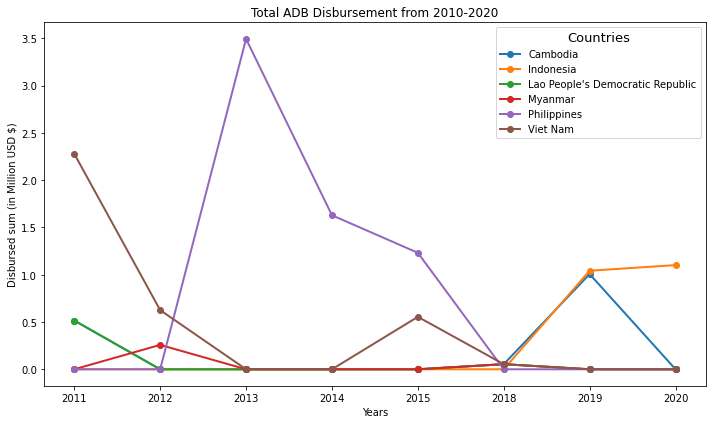

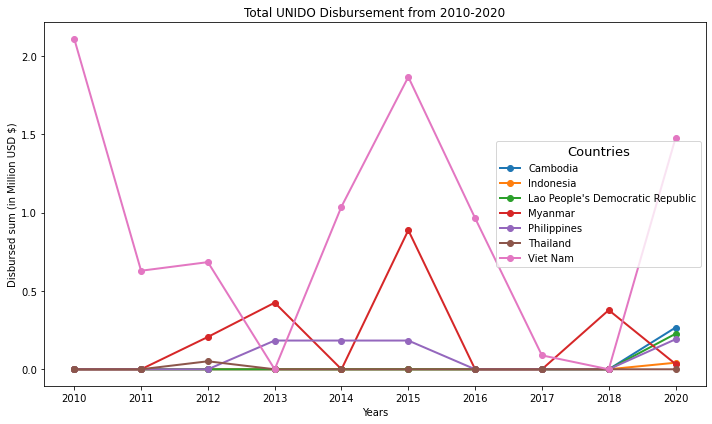

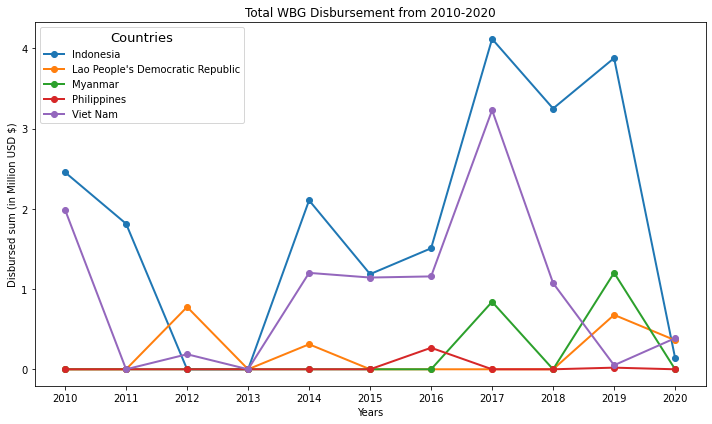

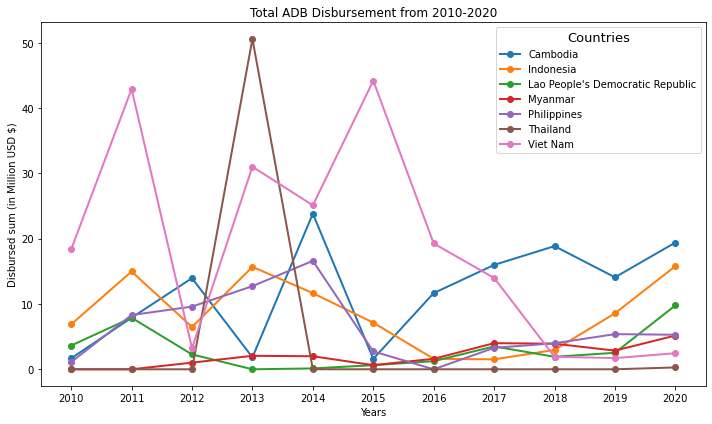

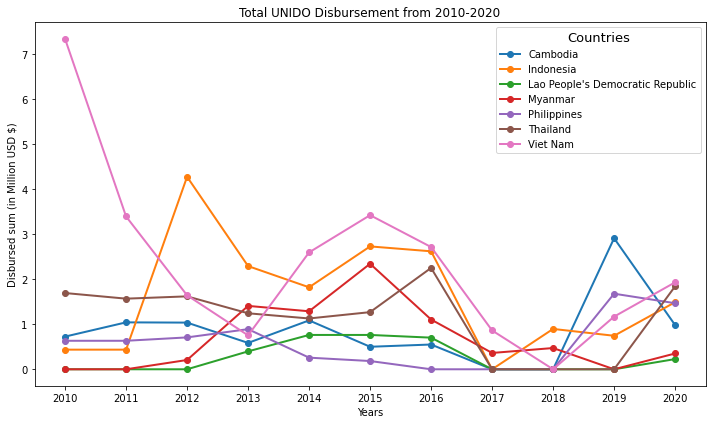

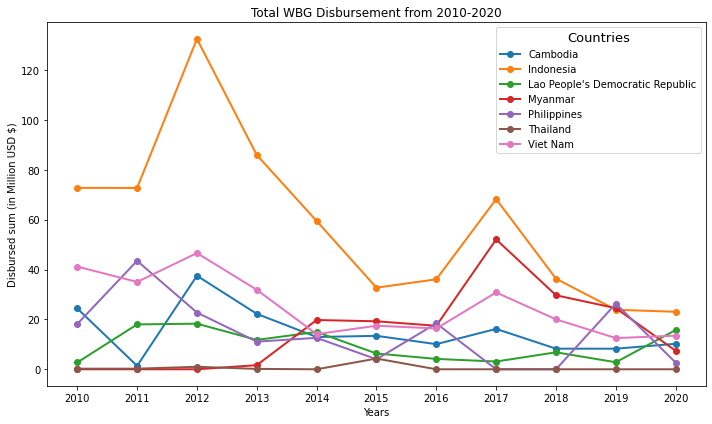

In [17]:
draw_line_plot(ind_sum_dic, 'ind_sum')
draw_line_plot(tot_sum_dic, 'tot_sum')

## Draw nested piechart

In [18]:
ind_codes = [22010, 22020, 22030, 22040, 23010, 23020, 23030, 23040, 23050,
                23061, 23062, 23063, 23064, 23065, 23066, 23067, 23068,23069,
                23070, 23081, 23082, 32110, 32120, 32130, 32140, 32161, 32162,
                32163, 32164, 32165, 32166, 32167, 32168, 32169, 32170, 32171,
                32172, 32182, 32210, 32220, 32261, 32262, 32263, 32264, 32265,
                32266, 32267, 32268, 32310, 33120, 33130, 33140, 33181, 33210]
                
piechart_data = []

for keys in inst_keys:
    x = data[data['ChannelCode'].isin(inst_keys[keys])]
    x = x[x['RecipientCode'].isin(receipient_countries.values())]
    # create total data
    tot = x.loc[:,['RecipientCode', 'RecipientName', 'Year','ChannelCode', 'ChannelName', 'USD_Disbursement','PurposeCode']].sort_values(by = ['RecipientCode','Year'], ascending=True).reset_index(drop=True)
    condition = [
        tot['PurposeCode'].isin(ind_codes)
    ]
    value = ['ind']
    tot["sub_class"] = np.select(condition, value, default='non-ind')
    piechart_data.append(tot)

In [27]:
piechart_data[1].head()

,RecipientCode,RecipientName,Year,ChannelCode,ChannelName,USD_Disbursement,PurposeCode,sub_class
0,635.0,Myanmar,2012,41123.0,United Nations Industrial Development Organisa...,NaN,32130.0,ind
1,635.0,Myanmar,2012,41123.0,United Nations Industrial Development Organisa...,0.206366,33120.0,ind
2,635.0,Myanmar,2013,41123.0,United Nations Industrial Development Organisa...,0.424854,32130.0,ind
3,635.0,Myanmar,2013,41123.0,United Nations Industrial Development Organisa...,NaN,23110.0,non-ind
4,635.0,Myanmar,2013,41123.0,United Nations Industrial Development Organisa...,NaN,23110.0,non-ind


In [20]:
# aggfunc: 'sum' or 'count'
new_dic = {}
for i in piechart_data:
    x = i[pd.notnull(i['USD_Disbursement'])]
    key = i['ChannelName'][0].replace(' ', '_')
    if key == 'Asian_Development_Bank':
        key = 'ADB'
    elif key == 'United_Nations_Industrial_Development_Organisation':
        key = 'UNIDO'
    else:
        key = 'WBG'
    x = x.groupby(['RecipientName','sub_class']).agg({'USD_Disbursement': ['sum']}).reset_index(drop=False)    
    x.columns = ['RecipientName', 'sub_class', 'Disbursement_sum']
    pivot_table =x.pivot_table(columns=['RecipientName','sub_class'],
                                values = ['Disbursement_sum']).reset_index().fillna(0)
    pivot_table.columns = [':'.join(col).strip() for col in pivot_table.columns.values]
    # df = df.iloc[7].reset_index()
    # del df['level_0']
    new_dic[key] = x     

In [28]:
new_dic['ADB'].head()

,RecipientName,sub_class,Disbursement_sum
0,Cambodia,ind,1.576865
1,Cambodia,non-ind,129.215347
2,Indonesia,ind,2.144530
3,Indonesia,non-ind,91.128337
4,Lao People's Democratic Republic,ind,0.569918


In [22]:
# list(inner.index.get_level_values(0))

In [23]:
def getDuplicatesWithInfo(listOfElems):
    ''' Get duplicate element in a list along with thier indices in list
     and frequency count'''
    dictOfElems = dict()
    index = 0
    # Iterate over each element in list and keep track of index
    for elem in listOfElems:
        # If element exists in dict then keep its index in lisr & increment its frequency
        
        if elem in dictOfElems:
            dictOfElems[elem][0] += 1
            index -= 1
            dictOfElems[elem][1].append(index)
            index += 1
        else:
            # Add a new entry in dictionary 
            dictOfElems[elem] = [1, [index]]
            index += 2
            
 
    dictOfElems = { key:value for key, value in dictOfElems.items()}
    return dictOfElems

In [24]:
for elemnt in new_dic:
    key = elemnt
    print(key)

ADB
UNIDO
WBG


ADB
UNIDO
WBG


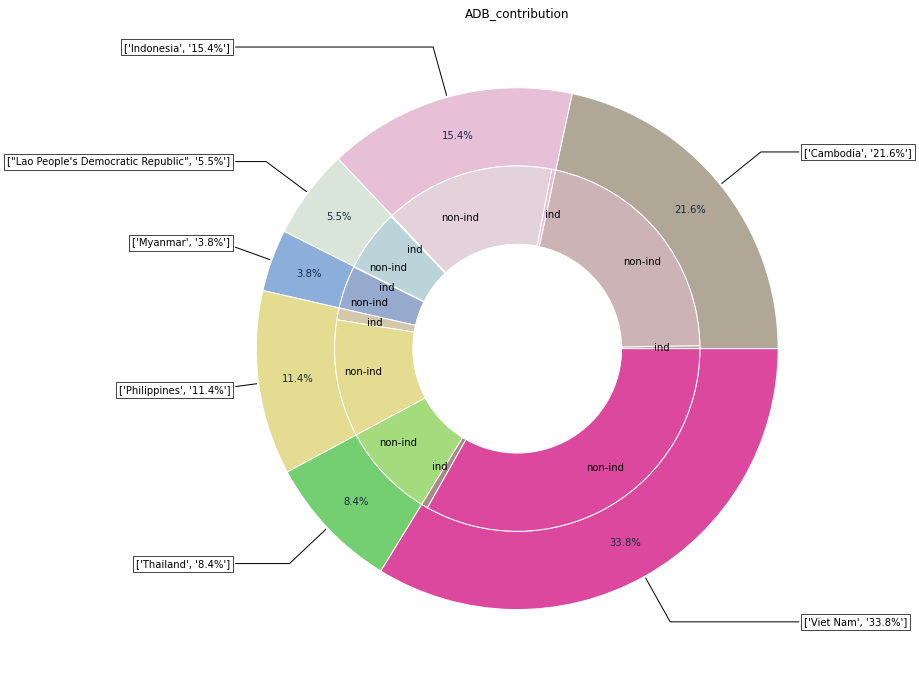

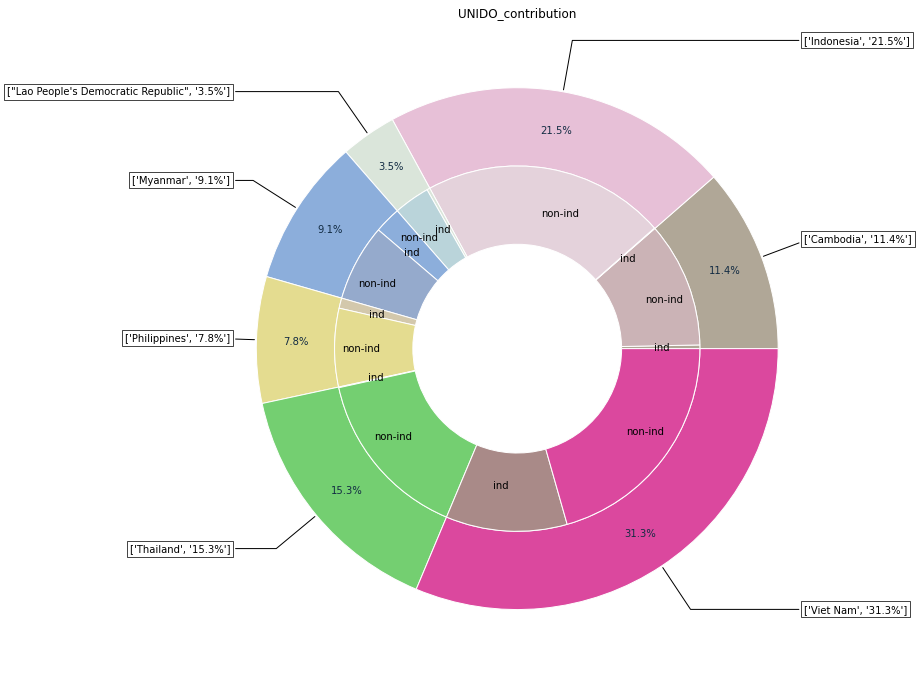

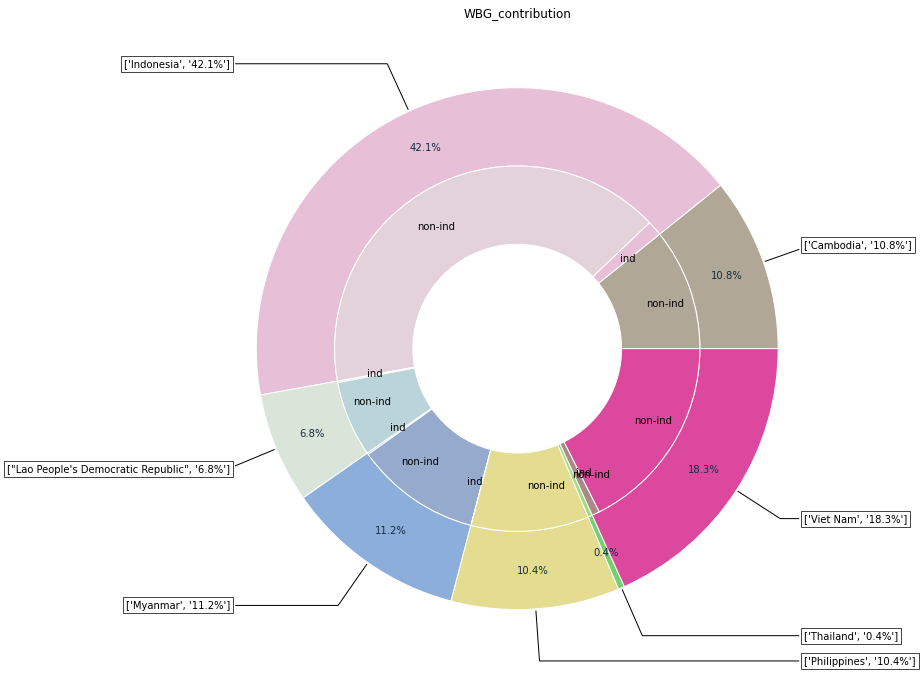

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

size = 0.3

# select color palette
col_palette = sns.blend_palette(['#B0A797','#ECC2DD','#D7ECD9','#779CDB','#FCDC97','#6BDB6D','#DB489E'],14)
indices = [0,2,4,6,9,11,13]
outer_colors=[col_palette[i] for i in indices]

for elemnt in new_dic:
    fig, ax = plt.subplots(figsize=(24,12))
    fig.set_facecolor('w')

    dict_key = elemnt
    outer = new_dic[dict_key].sort_values(by=['Disbursement_sum']).groupby('RecipientName').sum() ;  outer
    inner = new_dic[dict_key].sort_values('Disbursement_sum').groupby(['RecipientName','sub_class']).sum(); inner
    print(dict_key)

    #draw outer pie chart

    wedges, texts, autotexts = ax.pie(outer.values.flatten(), radius=1,
                                autopct='%1.1f%%', pctdistance=0.85,
                                wedgeprops=dict(width=size, edgecolor='w'),
                                colors=outer_colors)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")    


    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate([outer.index[i],str(autotexts[i]).split("'")[1]], xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)
    for autotext in autotexts:
        autotext.set_color('#132C43')

    #### Inner Pie
    ### auto retrieve inner colors
    # List of strings
    listOfElems = list(inner.index.get_level_values(0))
    dictOfElems = getDuplicatesWithInfo(listOfElems)
    innercColIndexes = []
    for key, value in dictOfElems.items():
        innercColIndexes.extend(value[1])
        # print('Element = ', key , ' :: Repeated Count = ', value[0] , ' :: Index Positions =  ', value[1])

    inner_colors=[col_palette[i] for i in innercColIndexes]
    inner_labels=inner.index.get_level_values(1)

    ax.pie(inner.values.flatten(), radius=1-size, 
        labels = inner_labels, 
        labeldistance= 0.75,
        wedgeprops=dict(width=size, edgecolor='w'),
        colors=inner_colors)

    ax.set(aspect="equal", title=dict_key+'_contribution')
    
    
    name_ext = 'piecharts/'+"".join((dict_key, "_piechart_by_countries.png"))
    plt.savefig(name_ext)